In [1]:
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt

In [2]:
def generar_datos(n,sigma, Q):
    D = jv(Q,range(2000)) + sigma * np.random.randn(2000) 
    Xr = np.random.choice(range(2000),n)
    Dt = D[Xr]
    return D,Xr,Dt

In [3]:
def calcula_dif(D,Dt,Xt):
    x = [i for i in range(2000)]

    y2 = np.polynomial.polynomial.polyval(x, np.polyfit(Xt,Dt,2))

    y10= np.polynomial.polynomial.polyval(x, np.polyfit(Xt,Dt,10))

    E2 = np.square(D - y2).mean()
    E10 = np.square(D - y10).mean()
    
    return E10 - E2

In [4]:

data = [generar_datos(n, 1, 10) for n in range(50,1001,50)]
diferencias = [calcula_dif(d,dt,xt) for (d,dt,xt) in data]


In [5]:
diferencias = 10e-60 * np.array(diferencias)

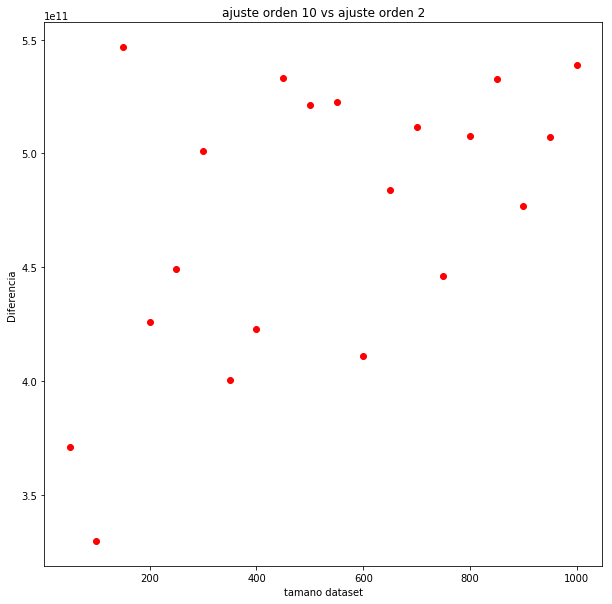

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.plot([i for i in range(50,1001,50)], diferencias, 'ro')
plt.title("ajuste orden 10 vs ajuste orden 2")
plt.xlabel("tamano dataset")
plt.ylabel("Diferencia");